In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

In [5]:
cancer_df = pd.concat([X, y], axis = 1)

# Data Exploration

In [6]:
cancer_df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [7]:
cancer_df.shape

(699, 10)

In [8]:
cancer_df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Data Cleaning

In [9]:
cancer_df.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [10]:
cancer_df = cancer_df.dropna()

In [11]:
cancer_df.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,0
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


# Feature Selection

In [12]:
cancer_df.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity_of_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity_of_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


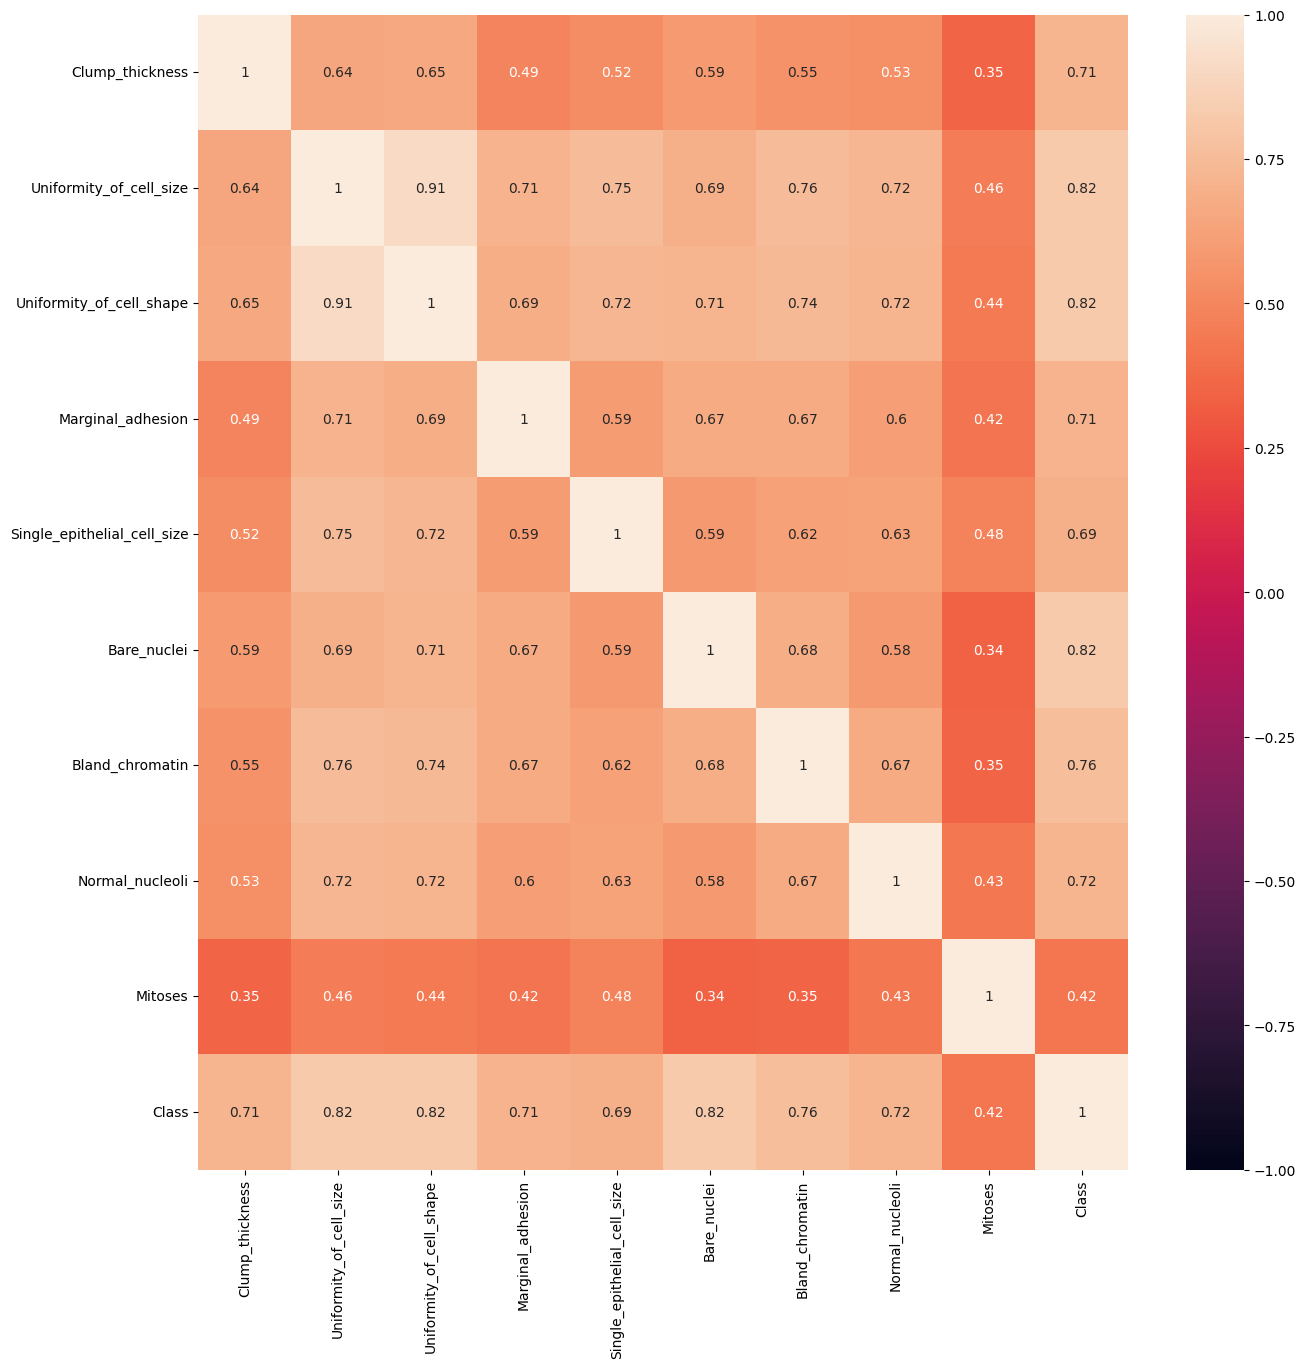

In [13]:
corr = cancer_df.corr()
plt.figure(figsize = (15, 15))
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [14]:
X = cancer_df.drop(columns = ['Mitoses', 'Class'])
y = cancer_df['Class']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
logreg = LogisticRegression()

In [22]:
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [26]:
score = logreg.score(X_test, y_test)
print(score)

0.9415204678362573


In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103   4]
 [  6  58]]


In [29]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       107
   malignant       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [30]:
print(logreg.coef_, logreg.intercept_)

[[0.46679399 0.14859758 0.20254459 0.2051571  0.25696077 0.44703338
  0.33652285 0.24741938]] [-9.4296378]


# KNN
K = 5

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = KNN.predict(X_test)

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103   4]
 [  5  59]]


In [39]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.95      0.96      0.96       107
   malignant       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [38]:
score = KNN.score(X_test, y_test)
print(score)

0.9473684210526315


# Linear SVM

In [34]:
from sklearn.svm import SVC

SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [40]:
y_pred = SVM.predict(X_test)

In [41]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102   5]
 [  4  60]]


In [42]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.96      0.95      0.96       107
   malignant       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [43]:
score = SVM.score(X_test, y_test)
print(score)

0.9473684210526315


# SVM

kernel = rbf

In [44]:
SVM2 = SVC(kernel = 'rbf', random_state = 0)
SVM2.fit(X_train, y_train)

SVC(random_state=0)

In [45]:
y_pred = SVM2.predict(X_test)

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[102   5]
 [  4  60]]


In [47]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.96      0.95      0.96       107
   malignant       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [48]:
score = SVM2.score(X_test, y_test)
print(score)

0.9473684210526315


# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = NB.predict(X_test)

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[100   7]
 [  2  62]]


In [52]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.98      0.93      0.96       107
   malignant       0.90      0.97      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [53]:
score = NB.score(X_test, y_test)
print(score)

0.9473684210526315


# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [56]:
y_pred = DTC.predict(X_test)

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[105   2]
 [  6  58]]


In [58]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.95      0.98      0.96       107
   malignant       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [59]:
score = DTC.score(X_test, y_test)
print(score)

0.9532163742690059


# Random Forest

estimators = 10

In [61]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier (max_depth = 10, random_state= 0, n_estimators = 10)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=0)

In [62]:
y_pred = RFC.predict(X_test)

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103   4]
 [  6  58]]


In [64]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       107
   malignant       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [65]:
score = RFC.score(X_test, y_test)
print(score)

0.9415204678362573


# XGBoost

In [80]:
cancer_df['Class'].replace({2:0}, inplace = True)
cancer_df['Class'].replace({4:1}, inplace = True)

In [81]:
cancer_df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [84]:
X = cancer_df.drop(columns = ['Mitoses', 'Class'])
y = cancer_df['Class']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [89]:
import xgboost as xgb

XGB = xgb.XGBClassifier(objective = 'binary:logistic', eval_metric = 'mlogloss')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [91]:
y_pred = XGB.predict(X_test)

In [93]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103   4]
 [  4  60]]


In [94]:
print(classification_report(y_test, y_pred, target_names = ['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.96      0.96      0.96       107
   malignant       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [95]:
score = XGB.score(X_test, y_test)
print(score)

0.9532163742690059
